## Visualizing results of the Third Edition -  Original Geoparser

We have run the [Edinburgh geoparser](https://programminghistorian.org/en/lessons/geoparsing-text-with-edinburgh#patch-fix) to extract and resolvoe locations contained within the books of the **Third Edition** of the *Encyclopaedia Britannica*
                             
The query for running that we have used is the following: 

`spark-submit --py-files defoe.zip defoe/run_query.py nls_third_edtion.txt nls defoe.nls.queries.geoparser_pages -r geoparser_original_EB_third_edition -n 16`




### Loading the necessary libraries

In [1]:
import yaml
from IPython.core.display import display, HTML
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
mpl.rcParams['figure.dpi']=300

### Functions

In [2]:
def read_query_results(filename):
    with open('./results_NLS/'+filename, 'r') as f:
        query_results = yaml.load(f)
    return query_results


In [3]:
def geresolution_dataframe(result):
    dfs=[]
    data=[]
    c_locs=[]
    for i in result.keys():
        t_ind = 0
        e_ind = 0
        for k in result[i]:
            locs= k["georesolution_page"]
            page = k["text_unit id"]
       
            if locs != {}:
                data=[]
                l_ind = 0
                for i in locs:
                    if type(locs[i]) == type([]) :
                        c_locs=locs[i].copy()
                        c_locs.append(i.split("-")[0])
                        c_locs.append(page)
                        data.append(c_locs)
                        l_ind = l_ind + 1   
                e_ind = t_ind + l_ind 
                if data:
                    df_page = pd.DataFrame(data, columns = ['Latitude', 'Longitude', 'Place', 'Page'], 
                                      index=list(range(t_ind, e_ind)))
                    dfs.append(df_page)
                    t_ind=e_ind
    df_total = pd.concat(dfs)
    return df_total

In [4]:
def get_place(df, lat, long):
    df_new=df.loc[(df['Latitude'] == lat) & (df_total['Longitude'] == long)]['Place']
    return df_new.count(), df_new.iloc[0]

In [5]:
def label_freq_places(df_total, df_max_geolocations, filter_list):
    place_label=[]
    place_freq = []
    i_limit = 15
    i =0
    k =0 
    while k < i_limit:
        place_count, place_name = get_place(df_total, df_max_geolocations.iloc[i]['Latitude'], df_max_geolocations.iloc[i]['Longitude'] )
        if place_name not in filter_list:
            print(i, place_count,place_name)
            place_label.append(place_name)
            place_freq.append(place_count)
            k = k + 1
        i = i + 1
    return place_label, place_freq

In [6]:
def plot_bar_places(place_label, place_freq):
    # this is for plotting purpose
    index = np.arange(len(place_label))
    plt.bar(index, place_freq, color='orange')
    plt.xlabel('Places')
    plt.ylabel('Frequency of Places')
    plt.xticks(index, place_label, rotation=40, fontsize=8)
    plt.title('15 Places most mentioned in the using the Original Geoparser')
    #plt.show()
    plt.savefig('Original3rdEdition.png', dpi=300)

### Information about the defoe geoparser query

This query does the following tasks:

- Ingests all the pages from all the books of the first edition
- Cleans the text applied two fixes: Long-s and hyphen words
- Identifies *entities* using the original geotagging of the Edinburgh geoparser. 
- From the previous entities, just selects the one about *location* and creates an xml (in memory) per page with these "location" entities. 
- Applies the georesolve of the Edinburgh geoparser to each xml and gets lat and long. **Important: Everything is in memory, we do not create XML files in those steps**
- Group the results by Book's title, and also gets some informative metadata

As a result we get a file per gazetter|book with an entry per page with the following information:

    * archive_filename: Path to the gazetteer 
    * clean_text: Page's clean text after applying 2 fixes: long-S and hyphenate words
    * edition: Edition of the gazetteer
    * georesolution_page: Page's geolocations after applying the georesolver
    * model: defoe model – could be fmp|nls|papers|alto. In this case is “nls”
    * text_unit: page (for other defoe models could be “article”)
    * num_text_unit: number of tex units. In this case, number of pages of this particular book (e.g. 832)
    * page_filename: Page's filename (page's relative path)
    * text_unit id: The number of this page (e.g. Page 1)
    * lang_model : The language model applied (original_geoparser)
    * type_distribution: type of document (newspaper|book). In this case is "book". 
    * year: Publication year 


In [7]:
results=read_query_results('geopaser_original_EB_third_edition')

In [8]:
df_total= geresolution_dataframe(results)

In [9]:
df_total[["Place"]].count()

Place    222753
dtype: int64

In [10]:
df_total.groupby("Page").count()

,Latitude,Longitude,Place
Page,,,
Page10,363,363,363
Page100,299,299,299
Page1000,12,12,12
Page1001,24,24,24
Page1002,12,12,12
Page1003,22,22,22
Page1004,43,43,43
Page1005,28,28,28
Page1006,5,5,5


In [11]:
df_total.groupby(["Latitude", "Longitude"]).count()

Place    Page
Latitude  Longitude                 
                      218717  218717
-0.22831  -78.34316        2       2
-0.25     -79.13333        2       2
-1.45583  -48.50444        1       1
-1.9      -79.76667        1       1
-10       -55              3       3
          -75.25           8       8
-10.15923 -76.2925         2       2
-10.21111 -36.84028        1       1
-10.36667 38.45            1       1
-12.04318 -77.02824        1       1
-12.15    17.66667         1       1
-12.33333 14.76667         1       1
-12.5     18.5             1       1
-12.76028 35.40639         1       1
-13.84056 39.41417         1       1
-14.60485 -57.65625        3       3
-16.28333 -151.83333       1       1
-16.62664 -151.49221       2       2
-16.74965 -151.03077       4       4
-16.83333 -151.41667       6       6
-16.84461 -151.33443       1       1
-17       -150             1       1
-17.025   -149.55833       2       2
-17.53333 -149.83333       1       1
-17.58397 178.49001        1       1
-17.6486  -149.42951      11      11
-17.66306 36.76667         1       1
-17.80438 -69.42863        1       1
-17.91206 178.53986        1       1
...                      ...     ...
60.53378  -165.10366       1       1
61.08066  28.32404         1       1
61.25707  7.0015           1       1
62        10               5       5
          15              14      14
64.03795  11.23999         1       1
65        -18              1       1
65.84811  24.14662         5       5
65.85811  13.19684         1       1
67.75     26.5             4       4
68.50472  112.4485         2       2
69.07944  15.56569         1       1
7.1881    21.09375        51      51
7.20254   -58.62129        1       1
7.23667   -72.47806        1       1
7.71952   -64.72505        1       1
70.48456  -21.96221        2       2
70.929    149.60884        1       1
71.98002  102.47111        5       5
8         -66              2       2
8.25      -82.16667        6       6
8.35      4.33333          1       1
80.33653  53.86512         7       7
9         -80              2       2
          39.5             2       2
9.29487   11.72637         3       3
9.31667   -82.16667        2       2
9.52392   -75.58139        1       1
9.67102   17.46835         1       1
9.79029   -74.78244        2       2

[1502 rows x 2 columns]

In [12]:
df_filter = df_total[['Latitude','Longitude']].groupby(['Latitude', 'Longitude'])['Longitude'] \
                             .count() \
                             .reset_index(name='count') \
                             .sort_values(['count'], ascending=False)     

df_max_geolocations=df_filter.drop([0])
# getting the 10 GEOLOCATIONS more repeated
df_max_geolocations.head(10)


,Latitude,Longitude,count
1317,52.16045,-0.70312,158
784,41.89193,12.51133,115
1022,46,2,105
1363,53,-8,105
1274,51.50853,-0.12574,61
849,42.83333,12.83333,58
1438,56,-4,56
1305,52,20,55
1484,7.1881,21.09375,51
1136,48.69096,9.14062,46


In [13]:
# Getting the geolocation details of the max frequency of the first row of the previous table
place_count, place_name= get_place(df_total, '52.16045', '-0.70312')
place_count, place_name

(32, 'Britain')

In [17]:
#Getting the 15 places (and their frequencies) most mentioned
filter_list=['Luther']
place_label, place_freq = label_freq_places(df_total, df_max_geolocations, filter_list)
    

0 158 England
1 115 Rome
2 105 France
3 105 Ireland
4 61 London
5 58 Italy
6 56 Scotland
7 55 Poland
8 51 Africa
9 46 Europe
10 45 Spain
11 43 Germany
12 43 Portugal
13 39 EDINBURGH
15 32 Britain


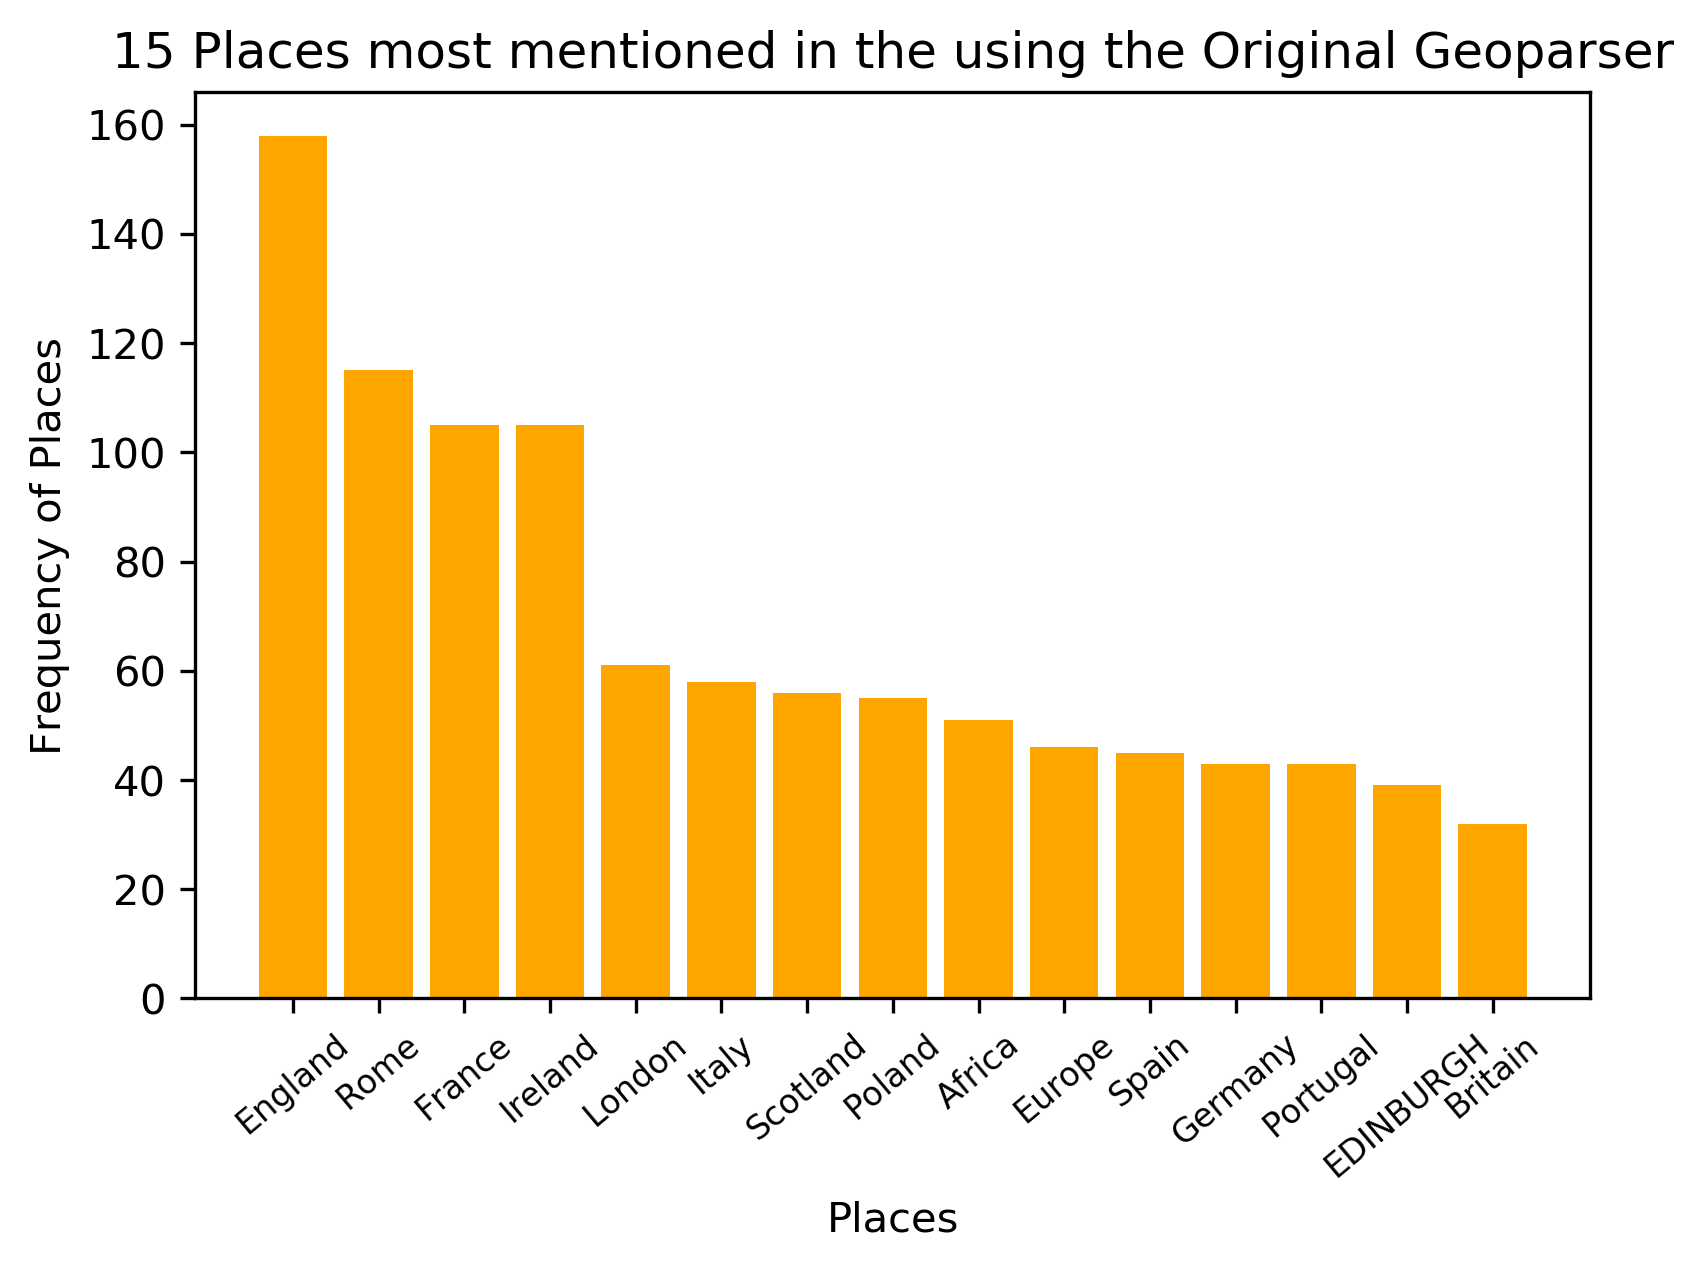

In [18]:
#Visualizing the 15 places in a Bar plot
mpl.rcParams['figure.dpi']=300
plot_bar_places(place_label, place_freq)